In [1]:
from data_cleaner import Data_Cleaner

In [2]:
#Load data with the datacleaner class
data_container = Data_Cleaner("C:/Users/timki/Documents/GitHub/MLProject1/project1/data/train.csv")

In [3]:
from proj1_helpers import *
y, tX, ids = load_csv_data("C:/Users/timki/Documents/GitHub/MLProject1/project1/data/train.csv")

In [13]:
with open("../data/train.csv") as fileobj:
    #print("Feature names: \n\n")
    names = fileobj.readline().rstrip("\n")
    feature_names = names.split(sep=",")[2:] # remove ID and prediction
    #for easier access to variables make index dict
    f_in = {x:v for v,x in enumerate(feature_names)}

In [14]:
f_in

{'DER_mass_MMC': 0,
 'DER_mass_transverse_met_lep': 1,
 'DER_mass_vis': 2,
 'DER_pt_h': 3,
 'DER_deltaeta_jet_jet': 4,
 'DER_mass_jet_jet': 5,
 'DER_prodeta_jet_jet': 6,
 'DER_deltar_tau_lep': 7,
 'DER_pt_tot': 8,
 'DER_sum_pt': 9,
 'DER_pt_ratio_lep_tau': 10,
 'DER_met_phi_centrality': 11,
 'DER_lep_eta_centrality': 12,
 'PRI_tau_pt': 13,
 'PRI_tau_eta': 14,
 'PRI_tau_phi': 15,
 'PRI_lep_pt': 16,
 'PRI_lep_eta': 17,
 'PRI_lep_phi': 18,
 'PRI_met': 19,
 'PRI_met_phi': 20,
 'PRI_met_sumet': 21,
 'PRI_jet_num': 22,
 'PRI_jet_leading_pt': 23,
 'PRI_jet_leading_eta': 24,
 'PRI_jet_leading_phi': 25,
 'PRI_jet_subleading_pt': 26,
 'PRI_jet_subleading_eta': 27,
 'PRI_jet_subleading_phi': 28,
 'PRI_jet_all_pt': 29}

(array([6.6487e+04, 5.0980e+03, 7.3400e+02, 1.5500e+02, 4.3000e+01,
        1.3000e+01, 8.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 30.    ,  99.1456, 168.2912, 237.4368, 306.5824, 375.728 ,
        444.8736, 514.0192, 583.1648, 652.3104, 721.456 ]),
 <a list of 10 Patch objects>)

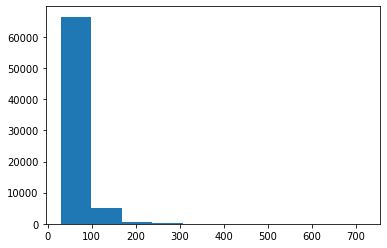

In [42]:
import matplotlib.pyplot as plt
#PRI_jet_subleading_pt, momentum of jet with second largest momentum, -999 if only one jet
plt.hist(tX[tX[:,26]>-998][:,26], bins=10)

(array([1.29686e+05, 1.65110e+04, 2.97700e+03, 6.73000e+02, 1.87000e+02,
        4.50000e+01, 7.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  30.    ,  139.0573,  248.1146,  357.1719,  466.2292,  575.2865,
         684.3438,  793.4011,  902.4584, 1011.5157, 1120.573 ]),
 <a list of 10 Patch objects>)

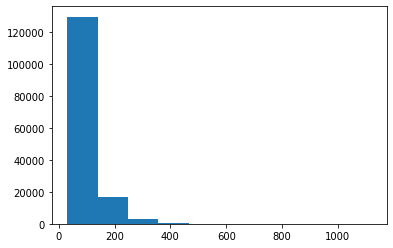

In [47]:
#PRI_jet_leading_pt, momentum of jet with largest momentum, -999 if no jet
plt.hist(tX[tX[:,23]>-998][:,23], bins=10)

#similar distribution

(array([3.4613e+04, 3.5003e+04, 3.1784e+04, 2.4001e+04, 1.4613e+04,
        6.9380e+03, 2.4140e+03, 6.4000e+02, 8.0000e+01, 1.0000e+00]),
 array([3.40119738, 3.76323719, 4.12527699, 4.4873168 , 4.84935661,
        5.21139641, 5.57343622, 5.93547602, 6.29751583, 6.65955563,
        7.02159544]),
 <a list of 10 Patch objects>)

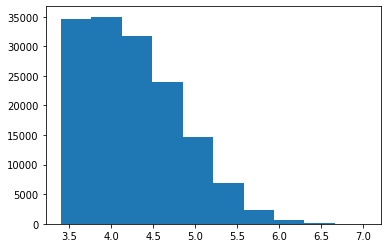

In [49]:
#PRI_jet_leading_pt, momentum of jet with largest momentum, -999 if no jet
plt.hist(np.log(tX[tX[:,23]>-998][:,23]), bins=10)

(array([ 1963.,  8301., 16486., 22735., 25548., 25798., 22878., 16103.,
         8371.,  1904.]),
 array([-4.499 , -3.5992, -2.6994, -1.7996, -0.8998,  0.    ,  0.8998,
         1.7996,  2.6994,  3.5992,  4.499 ]),
 <a list of 10 Patch objects>)

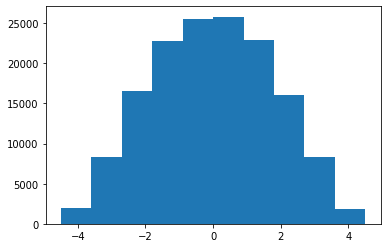

In [48]:
#PRI_jet_leading_eta, pseudorapidity of jet with largest momentum, -999 if no jet
plt.hist(tX[tX[:,24]>-998][:,24], bins=10)

(array([5.5794e+04, 1.1374e+04, 3.5360e+03, 1.2390e+03, 4.1300e+02,
        1.2900e+02, 4.0000e+01, 1.3000e+01, 3.0000e+00, 2.0000e+00]),
 array([  13.602 ,  509.7397, 1005.8774, 1502.0151, 1998.1528, 2494.2905,
        2990.4282, 3486.5659, 3982.7036, 4478.8413, 4974.979 ]),
 <a list of 10 Patch objects>)

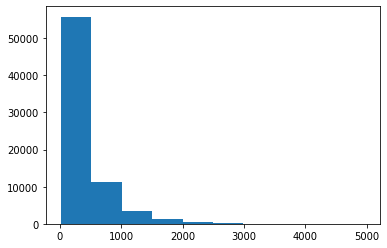

In [50]:
#derived mass jet-jet, mass of two jets, -999 if one or less jet
plt.hist(tX[tX[:,5]>-998][:,5], bins=10)

In [4]:
print(np.min(tX[tX[:,5]>-998][:,5]), np.max(tX[tX[:,5]>-998][:,5]))
data = tX[:,5]

def normalize(tX):
        """standardizes data
        """
        tX -= np.mean(tX)
        tX /= np.std(tX)
        
        return tX       

def standardise(tX):
    tX -= np.min(tX)
    tX /= (np.max(tX) - np.min(tX))
    
    return tX

data[data==-999] = 0

data_norm = normalize(data)
data_standard = standardise(data)


13.602 4974.979


In [6]:
data

array([0.02506764, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

(array([1.77457e+05, 3.24320e+04, 3.14240e+04, 6.35400e+03, 1.71500e+03,
        4.64000e+02, 1.21000e+02, 2.60000e+01, 5.00000e+00, 2.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

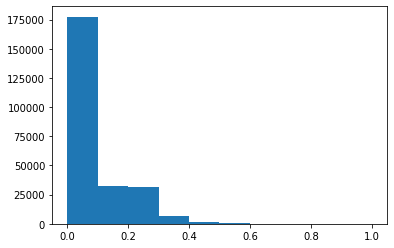

In [65]:
plt.hist(tX_standard[:,5], bins=10)

0.0665825824409493